In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

## K alpha lines analysis

In [2]:
K_alpha = pd.read_csv("K-alpha analysis.csv")
K_alpha

,Ato,Kline,Uncertainty,Energy(keV),FWHM
0,17,319.91,5.53,2.62239,19.2335
1,22,540.14,0.36,4.51080,24.2249
2,24,646.27,0.47,5.41470,25.4010
3,26,761.83,0.54,6.40380,25.8590
4,28,888.28,0.42,7.47810,26.6226
5,29,954.62,0.36,8.04770,27.9838
6,30,1024.15,0.27,8.63880,28.2923
7,47,2602.78,0.75,22.16290,38.6308
8,48,2720.37,0.57,23.17360,41.4460
9,50,2963.52,0.61,25.27130,45.7194


In [3]:
#Define a function that takes in two array and their uncertainty
#and then calculat the uncertainty of the slope and y-intercept
def slp_yitcp_error(x,y,errx,erry):
    slp_max = (y[len(y)-1]+erry[len(erry)-1]-y[0]+erry[0]) / (x[len(x)-1]-errx[len(errx)-1]-x[0]-errx[0]) #find maximum slope using largest y increasement and least x increasement
    slp_min = (y[len(y)-1]-erry[len(erry)-1]-y[0]-erry[0]) / (x[len(x)-1]+errx[len(errx)-1]-x[0]+errx[0])
    yitcp_max = y[0]-slp_min*x[0]                                                                         #use the maximum slope to find minimum y-intercept
    yitcp_min = y[0]-slp_max*x[0]
    slp_err = (slp_max-slp_min)/2                                                                         #uncertainty is half of the seperation
    yitcp_err = (yitcp_max-yitcp_min)/2
    return[slp_err, yitcp_err]

- Here, we first want to calculate the uncertainty of the square root of channel number. The uncertainty propagation is given by 
$$\delta_{\sqrt{Ch}}=\frac{1}{2}\frac{\delta_{Ch}}{\left|Ch\right|}\left|\sqrt{Ch}\right|$$

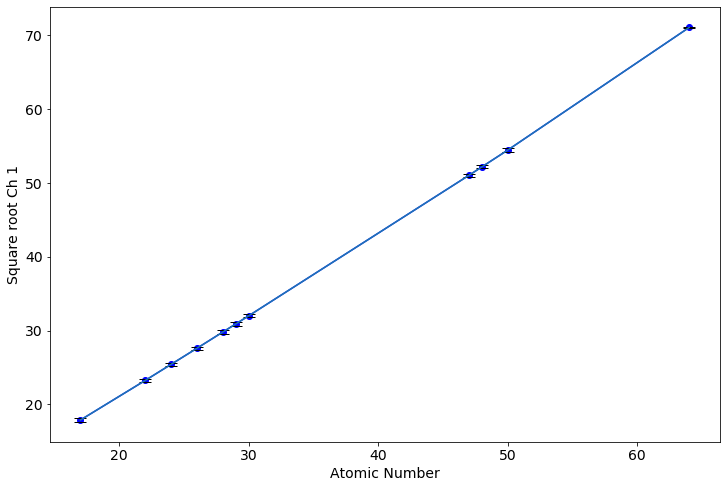

array([ 1.12660132, -1.65880752])

In [4]:
#First calculate the error propagation in this square root process
yerr = 0.5 * (0.5 * K_alpha.FWHM / K_alpha.Kline) * np.sqrt(K_alpha.Kline)
#yerr = K_alpha.Uncertainty
mpl.rcParams['figure.figsize'] = 12.0,8.0  
mpl.rcParams['font.size'] = 14.0 

plt.yscale('linear')  
plt.xscale('linear')

plt.xlabel(r'Atomic Number')
plt.ylabel(r'Square root Ch 1')

plt.plot(K_alpha.Ato,np.sqrt(K_alpha.Kline),"o-b")
plt.errorbar(K_alpha.Ato, np.sqrt(K_alpha.Kline), yerr = yerr, capsize = 6, ecolor = 'black')
plt.show()
#line fit the atomic number and sqrt of Ch, returns coefficient of the polynomial
coef = np.polyfit(K_alpha.Ato, np.sqrt(K_alpha.Kline), deg = 1)
coef

In [5]:
#find the uncertainty of slope and y intercept
slp_yitcp_err = slp_yitcp_error(K_alpha['Ato'], np.sqrt(K_alpha['Kline']),errx=np.zeros(len(K_alpha['Ato'])), erry=yerr)
slp_yitcp_err

[0.008036687642847373, 0.13662368992840612]

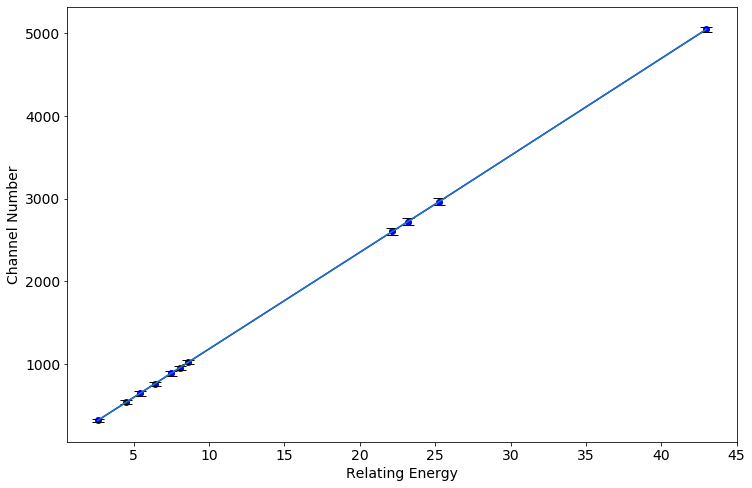

array([116.94831599,  12.61236394])

In [6]:
yerr = K_alpha.FWHM
mpl.rcParams['figure.figsize'] = 12.0,8.0  
mpl.rcParams['font.size'] = 14.0 

plt.yscale('linear')  
plt.xscale('linear')

plt.xlabel(r'Relating Energy')
plt.ylabel(r'Channel Number')

plt.plot(K_alpha['Energy(keV)'],K_alpha.Kline,"o-b")
plt.errorbar(K_alpha['Energy(keV)'],K_alpha.Kline, yerr = yerr, capsize = 6, ecolor = 'black')
plt.show()
#line fit Ch and its relating energy, return coefficient of the polynomial
coef2 = np.polyfit(K_alpha['Energy(keV)'], K_alpha.Kline, deg = 1)
coef2

In [7]:
#find the uncertainty of slope and y intercept
energy_calib_err = slp_yitcp_error(K_alpha['Energy(keV)'], K_alpha['Kline'], errx=np.zeros(len(K_alpha['Energy(keV)'])), erry=0.5*K_alpha['FWHM'])
energy_calib_err

[0.6213272911325518, 1.629362474993087]

- To calculate the screen constant, we start from the expression
$$\sqrt{Ch}=a_1Z+b_1$$
Given $Ch=a_2E+b_2$ and $E=\frac{hc}{\lambda}$, we arrive at the expression
$$\frac{1}{\lambda}=\frac{a_1^2Z^2+2a_1b_1Z+b_1^2-b_2}{a_2hc}$$
and compare to Moseley's Law 
$$\frac{1}{\lambda}=C\left(Z-\sigma\right)^2=CZ^2-2CZ\sigma+C\sigma^2$$
we conclude that
$\frac{2a_1b_1Z}{a_2hc}=-2CZ\sigma$, where $C=\frac{a_1^2}{a_2hc}$, and finally
$$\sigma=-\frac{b_1}{a_1}$$
- At this point, we have already determined the value of these three variables and their uncertainty. We have
|       | measured value | uncertainty |
|-------|----------------|-------------|
| $a_1$ | 1.1266         | 0.00803     |
| $a_2$ | 116.9483       | 0.62132     |
| $b_1$ | -1.6588        | 0.13662     |
| $b_2$ | 12.6123        | 1.6293      |
- Applying the error propagation formula
$$\delta_R=\sqrt{{(\frac{\partial R}{\partial X}\delta X)}^2+{(\frac{\partial R}{\partial Y}\delta Y)}^2+\cdots}$$
we get the screen constant as below
$$\sigma=1.4724\pm0.1217$$

In [8]:
Unknown = pd.read_csv("unknown K alpha analysis.csv")
Unknown

,sample#,peak_position,FWHM
0,1,646.45,25.7316
1,2,888.13,27.4579
2,3,1710.33,28.3636
3,4,2055.77,31.5721
4,5,2840.72,47.5051
5,6,996.35,27.5774


### Use Moseley's plot to dertermine Z

- Use the relation determined above, the atomic number Z is given by 
$$Z=\frac{\sqrt{Ch}-b_1}{a_1}$$, and the uncertainty of Z is again given by the application of error propagation formula
$$\delta R=\sqrt{{(\frac{\partial R}{\partial X}\delta X)}^2+{(\frac{\partial R}{\partial Y}\delta Y)}^2+\cdots}$$

In [9]:
Z = (np.sqrt(Unknown['peak_position'])+1.6588)/1.1266
#Zerr = np.sqrt(np.square(Unknown["FWHM"]/(2*1.1266*np.sqrt(Unknown["peak_position"])))+(0.13662/1.1266)^2+((np.sqrt(Unknown['peak_position']))+1.6588)/(1.1266^2)*0.00803)^2)
Cherr = np.square(Unknown["FWHM"]/(2*1.1266*np.sqrt(Unknown["peak_position"])))
b1err = np.square(0.13662/1.1266)
a1err = np.square((np.sqrt(Unknown['peak_position'])+1.6588)/1.2692*0.00803)
Zerr = np.sqrt(Cherr+b1err+a1err)

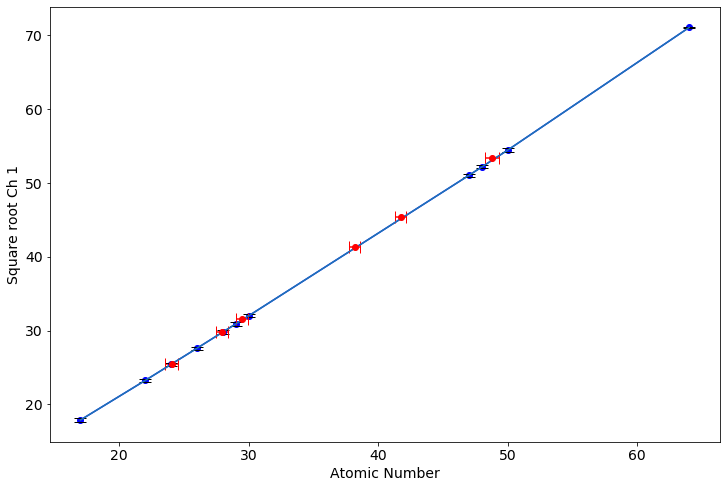

In [10]:
#First calculate the error propagation in this square root process
yerr = 0.5 * (0.5 * K_alpha.FWHM / K_alpha.Kline) * np.sqrt(K_alpha.Kline)
#yerr = K_alpha.Uncertainty
mpl.rcParams['figure.figsize'] = 12.0,8.0  
mpl.rcParams['font.size'] = 14.0 

plt.yscale('linear')  
plt.xscale('linear')

plt.xlabel(r'Atomic Number')
plt.ylabel(r'Square root Ch 1')

plt.plot(K_alpha.Ato,np.sqrt(K_alpha.Kline),"o-b")
plt.errorbar(K_alpha.Ato, np.sqrt(K_alpha.Kline), yerr = yerr, capsize = 6, ecolor = 'black')
plt.errorbar(Z, np.sqrt(Unknown['peak_position']), xerr=Zerr, c='r', capsize = 6, ecolor = "r", fmt='o')
plt.show()

- The red data points responds to different unknown sample, the atomic numbers and their uncertainty is given below
| Sample Number | Atomic Number(Z) | Uncertainty of Z |
|---------------|------------------|------------------|
| 1             | 24.0406          | 0.4957           |
| 2             | 27.9250          | 0.4706           |
| 3             | 38.1812          | 0.4259           |
| 4             | 41.7179          | 0.4456           |
| 5             | 48.7814          | 0.5404           |
| 6             | 29.4903          | 0.4574           |

### Use energy calbration to determine Z

- We first calculate the corresponding energy of each sample, and look up the table to determine the Z number.

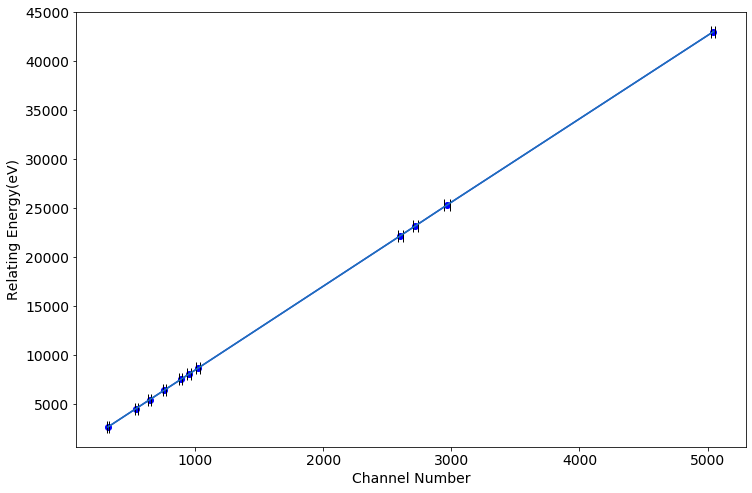

array([   8.55076595, -107.81230167])

In [11]:
xerr = 0.5*K_alpha.FWHM
mpl.rcParams['figure.figsize'] = 12.0,8.0  
mpl.rcParams['font.size'] = 14.0 

plt.yscale('linear')  
plt.xscale('linear')

plt.ylabel(r'Relating Energy(eV)')
plt.xlabel(r'Channel Number')

plt.plot(K_alpha.Kline, 1000*K_alpha['Energy(keV)'], "o-b")
plt.errorbar(K_alpha.Kline, 1000*K_alpha['Energy(keV)'], xerr = xerr, capsize = 6, ecolor = 'black')
plt.show()
#line fit Ch and its relating energy, return coefficient of the polynomial
coef2 = np.polyfit(K_alpha.Kline, 1000*K_alpha['Energy(keV)'], deg = 1)
coef2

In [12]:
energy_calib_err = slp_yitcp_error(K_alpha['Kline'], 1000*K_alpha['Energy(keV)'], erry=np.zeros(len(K_alpha['Energy(keV)'])), errx=0.5*K_alpha['FWHM'])
energy_calib_err

[0.04536329760466273, 14.512172536707567]

In [13]:
E = 8.5507*Unknown["peak_position"]-107.8123
Eerr = np.sqrt(np.square(Unknown['peak_position']*0.04536)+np.square(14.5127))

- By comparing the energy including uncertainty to the table, we conclude that 
| Sample Number | Energy     | Uncertainty of Energy | Corresponding Z |
|---------------|------------|-----------------------|-----------------|
| 1             | 5419.7877  | 32.7178               | 24              |
| 2             | 7486.3208  | 42.8199               | 28              |
| 3             | 14516.7064 | 78.9263               | 38              |
| 4             | 17470.4602 | 94.3722               | 42              |
| 5             | 24182.3322 | 129.6697              | 49              |
| 6             | 8411.6776  | 47.4674               | 30              |